## Customer Churn Predictions with Neural Network ML Model

### Name:  Leah Nicholson
### Date:  06-06-2025
### Description:  Analyzing customer churn through creation of a Neural Network Machine Learning Model.
### Dataset:  IBM Customer Churn

**CHURN**<br/>
Churn prediction is the process of forecasting which customers are likely to discontinue using a service or subscription.<br/>
It's essentially identifying customers at risk of leaving, allowing businesses to take proactive steps to retain them.<br/>
This is a critical aspect of business strategy, especially for subscription-based models, as retaining existing customers is often more cost-effective than acquiring new ones.<br/>

**OVERVIEW** <br/>
Each row represents a customer, each column contains customer’s attributes.<br/>
The raw data contains 7043 rows (customers) and 21 columns (features).<br/>
The “Churn” column is our target.<br/>

**COLUMNS**<br/>
**Churn:**   Customers who left within the last month <br/>
**Services:**   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies<br/>
**Customer account information:**  How long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges<br/>
**Demographic info about customers:**  Gender, age range, and if they have partners and dependents<br/>

# Data Exploration:

In [3]:
# Import modules 

import pandas as pd
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import tensorflow.keras as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Create dataframe

churn_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# View shape

churn_df.shape    # As expected:  7043 rows (customers), 21 columns

(7043, 21)

In [6]:
# View counts of target column (target column is Churn):

churn_df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [7]:
# View info - no nulls

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Preliminary visualizations of data

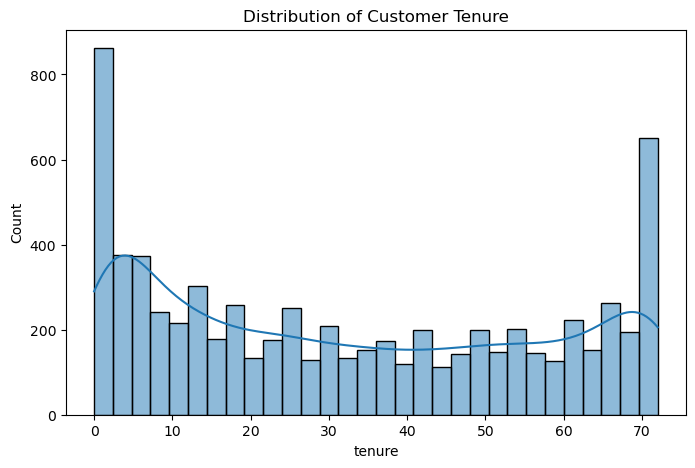

In [9]:
# Histogram of tenure
# Many new clients, and many who have been with company 70+ months

plt.figure(figsize = (8, 5))
sns.histplot(churn_df['tenure'], bins = 30, kde = True)
plt.title("Distribution of Customer Tenure")
plt.show()

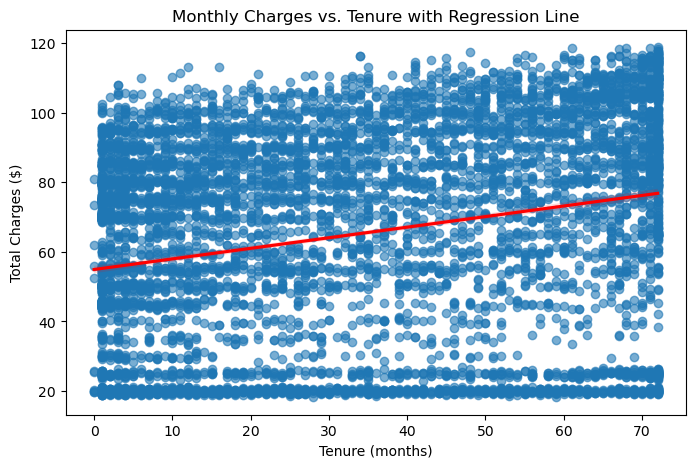

In [85]:
# Scatterplot
# Fairly positive correlation between Monthly Charges and Tenure

plt.clf()
plt.close()

plt.figure(figsize = (8, 5))
sns.regplot(x = churn_df['tenure'], y=churn_df['MonthlyCharges'], scatter_kws = {'alpha': 0.6}, line_kws = {'color': 'red'})

plt.title("Monthly Charges vs. Tenure with Regression Line")
plt.xlabel("Tenure (months)")
plt.ylabel("Total Charges ($)")
plt.show()


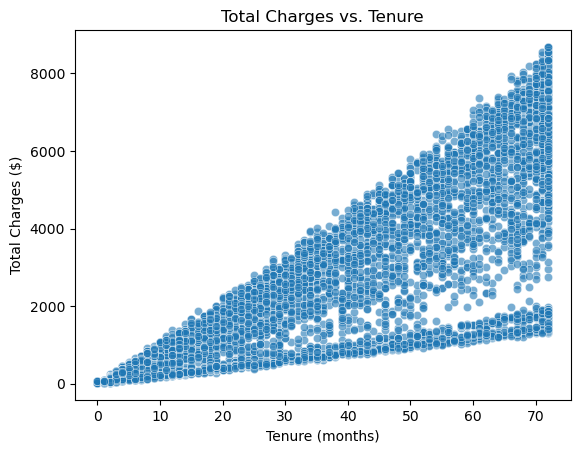

In [87]:
# Scatterplot: Total charges vs Tenure
# Naturally, with more time the total charge goes up

plt.clf()
plt.close()

sns.scatterplot(x = churn_df['tenure'], y = churn_df['TotalCharges'], alpha = 0.6)
plt.title("Total Charges vs. Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Total Charges ($)")
plt.show()

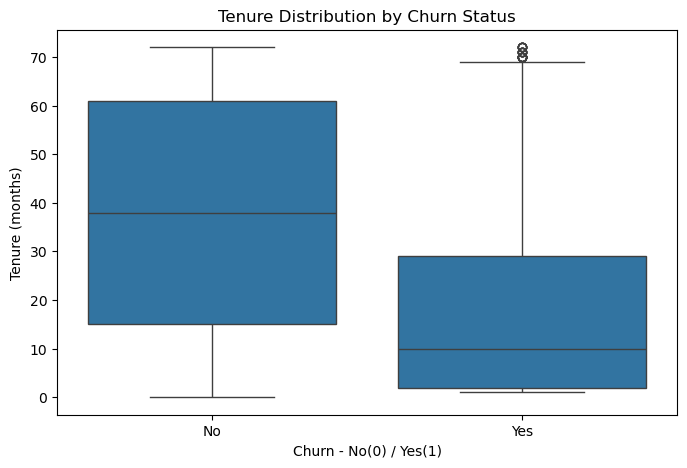

In [12]:
# Boxplot
# Customers who churned tend to have shorter tenures, as indicated by the lower median compared to those who stayed.
# The non-churned group has a much wider range, suggesting that many long-tenured customers remain with the service.

plt.clf()
plt.close()

plt.figure(figsize = (8, 5))
sns.boxplot(x = churn_df['Churn'], y = churn_df['tenure'])
plt.title("Tenure Distribution by Churn Status")
plt.xlabel("Churn - No(0) / Yes(1)")
plt.ylabel("Tenure (months)")
plt.show()

# Data Preprocessing:

### Fixing TotalCharges column

In [15]:
# Investigate why TotalCharges is object: check for nulls (none)

churn_df['TotalCharges'].isnull().sum()

0

In [16]:
# See if any contain spaces: (none)

churn_df[churn_df['TotalCharges'] == '']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [17]:
# Remove leading/trailing spaces

churn_df['TotalCharges'] = churn_df['TotalCharges'].str.strip()

In [18]:
# Convert column to numeric, then find nulls if they exist - I see that there are 11 rows with NaN as TotalCharges

churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors = 'coerce')
churn_df[churn_df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [19]:
# The tenure for these customers is 0 - they likely just joined
# Using the first month's bill as their TotalCharges

churn_df.loc[churn_df['TotalCharges'].isnull(), 'TotalCharges'] = churn_df['MonthlyCharges']

In [20]:
# Verify changes: should be no more NaN for TotalCharges [confirmed]

churn_df[churn_df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [21]:
# Columns like ID, Names, gender are not needed for analysis and can be dropped:

churn_df = churn_df.drop(columns = ['customerID', 'gender'])


In [22]:
# Verify changes

churn_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Label Encoding

In [24]:
# Use label encoder to convert values to binary for analysis:
from sklearn.preprocessing import LabelEncoder

# Select only object-type columns (categorical variables)
categorical_cols = churn_df.select_dtypes(include = ['object'])

# Extract column names into a list
encode_columns_list = categorical_cols.columns.tolist()

encoder = LabelEncoder()

for columns in encode_columns_list:
    churn_df[columns] = encoder.fit_transform(churn_df[columns])


In [25]:
churn_df.head()    # ALL columns are now numerical

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [26]:
# Check data using describe:

churn_df.describe().round(2)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.00,7043.00,7043.00,7043.00,7043.0,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.16,0.48,0.30,32.37,0.9,0.94,0.87,0.79,0.91,0.90,0.80,0.99,0.99,0.69,0.59,1.57,64.76,2279.80,0.27
std,0.37,0.50,0.46,24.56,0.3,0.95,0.74,0.86,0.88,0.88,0.86,0.89,0.89,0.83,0.49,1.07,30.09,2266.73,0.44
min,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.25,18.80,0.00
25%,0.00,0.00,0.00,9.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,35.50,398.55,0.00
50%,0.00,0.00,0.00,29.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,2.00,70.35,1394.55,0.00
75%,0.00,1.00,1.00,55.00,1.0,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,2.00,89.85,3786.60,1.00
max,1.00,1.00,1.00,72.00,1.0,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,118.75,8684.80,1.00


### Find the rest of non-numeric data:

In [28]:
# There are no more for the columns

print(churn_df.dtypes)

SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object


### Set up our x and y values

In [30]:
# Setting up our X and Y values - y is the target, x is all columns except target:

y = churn_df['Churn']   
x = churn_df.drop(['Churn'], axis = 1)   

In [31]:
# Use StandardScaler to make data more uniform
# The describe() above showed big differences in mean between columns
# Neural networks work better when inputs have similar scales—large variations in feature ranges can slow training or lead to poor convergence
# StandardScaler standardizes the features by centering them around zero and scaling them based on standard deviation

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)     # scales all columns in x dataframe

In [32]:
# StandardScaler returns a NumPy array

x

array([[-0.43991649,  1.03453023, -0.65401193, ...,  0.39855772,
        -1.16032292, -0.99266722],
       [-0.43991649, -0.96662231, -0.65401193, ...,  1.33486261,
        -0.25962894, -0.17219813],
       [-0.43991649, -0.96662231, -0.65401193, ...,  1.33486261,
        -0.36266036, -0.95812162],
       ...,
       [-0.43991649,  1.03453023,  1.5290241 , ...,  0.39855772,
        -1.1686319 , -0.85298475],
       [ 2.27315869,  1.03453023, -0.65401193, ...,  1.33486261,
         0.32033821, -0.87056638],
       [-0.43991649, -0.96662231, -0.65401193, ..., -1.47405205,
         1.35896134,  2.01392524]])

In [33]:
# Convert NumPy array back to pandas dataframe to describe:

pd.DataFrame(x).describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.44,-0.97,-0.65,-1.32,-3.05,-0.99,-1.18,-0.92,-1.03,-1.03,-0.93,-1.11,-1.12,-0.83,-1.21,-1.47,-1.55,-1.00
25%,-0.44,-0.97,-0.65,-0.95,0.33,-0.99,-1.18,-0.92,-1.03,-1.03,-0.93,-1.11,-1.12,-0.83,-1.21,-0.54,-0.97,-0.83
50%,-0.44,-0.97,-0.65,-0.14,0.33,0.06,0.17,0.24,0.11,0.11,0.24,0.02,0.01,-0.83,0.83,0.40,0.19,-0.39
75%,-0.44,1.03,1.53,0.92,0.33,1.12,0.17,1.41,1.24,1.25,1.40,1.15,1.14,0.37,0.83,0.40,0.83,0.66
max,2.27,1.03,1.53,1.61,0.33,1.12,1.53,1.41,1.24,1.25,1.40,1.15,1.14,1.57,0.83,1.33,1.79,2.83


# Data Modeling:

### Split data into training set and testing set


In [36]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [37]:
# use train_test_split to split the dataset into sets

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.8, random_state = 42)


In [38]:
ytrain.value_counts()

Churn
0    4138
1    1496
Name: count, dtype: int64

In [39]:
x.shape

(7043, 18)

### Create model and add layers

In [41]:
# Create the Sequential model:
model = tf.models.Sequential()

# Add layers to the neural network:
model.add(tf.layers.Dense(16, input_shape = (18,), activation = 'relu'))  # input_dim/input_shape is the input dimension (18 columns in my case)
model.add(tf.layers.Dense(32, activation = 'relu'))  # Hidden layer with 32 neurons
model.add(tf.layers.Dense(1, activation = 'sigmoid')) 

# Neural network is ready - time to compile:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(xtrain, ytrain, batch_size = 50, epochs = 100, verbose = 1, validation_split = 0.2)   


Epoch 1/100


C:\Users\mynew\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6638 - loss: 0.6377 - val_accuracy: 0.7773 - val_loss: 0.4736
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7578 - loss: 0.4942 - val_accuracy: 0.7950 - val_loss: 0.4377
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7862 - loss: 0.4561 - val_accuracy: 0.8039 - val_loss: 0.4274
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7883 - loss: 0.4351 - val_accuracy: 0.7933 - val_loss: 0.4283
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7889 - loss: 0.4335 - val_accuracy: 0.8030 - val_loss: 0.4202
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7947 - loss: 0.4269 - val_accuracy: 0.8057 - val_loss: 0.4175
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7853 - loss: 0.4341 - val_accuracy: 0.8075 - val_loss: 0.4154
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7841 - loss: 0.4399 - val_accuracy: 0.8083 - val_loss: 0.4

# Model Evaluation:

In [43]:
# Use testing set to analyze model

ypred = model.predict(xtest)
ypred = ypred.argmax(axis = 1)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [44]:
# Find accuracy score
# First run:  0.73527

from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.7352732434350603

<Axes: >

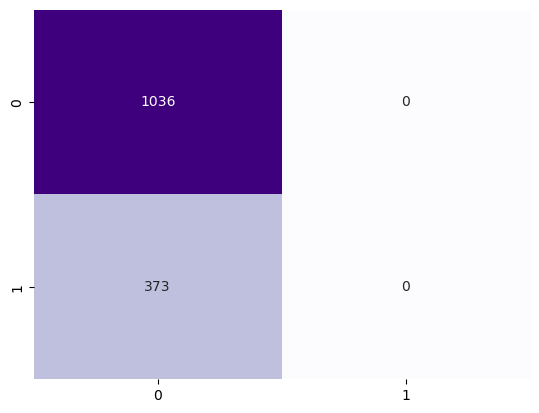

In [45]:
# Confusion matrix

cf_matrix = confusion_matrix(ytest, ypred)
sns.heatmap(cf_matrix, annot = True, fmt = 'd', cmap = 'Purples', cbar = False)

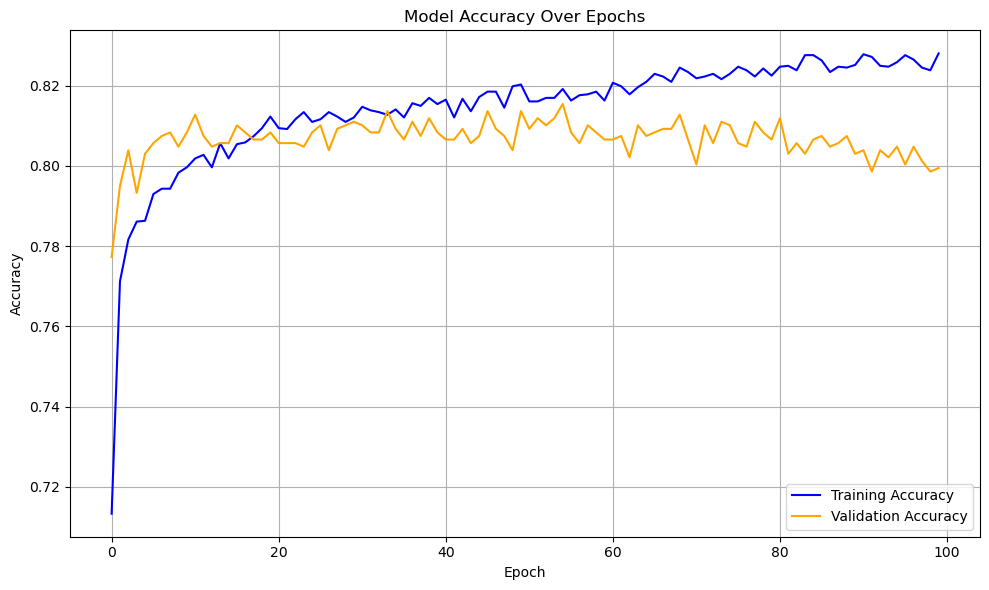

In [46]:
# Plotting the accuracy as each epoch runs

# Plot training and validation accuracy
plt.figure(figsize = (10, 6))

plt.plot(history.history['accuracy'], label = 'Training Accuracy', color = 'blue')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')

plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc = 'lower right')
plt.grid(True)
plt.tight_layout()

plt.show()


Training Accuracy steadily increases, peaking at around 0.83. This suggests the model is learning well from the training data. <br/>
Validation Accuracy climbs early and stabilizes around 0.80, but fluctuates slightly. The gap between training and validation accuracy is modest, hinting at possible overfitting, though not severe.

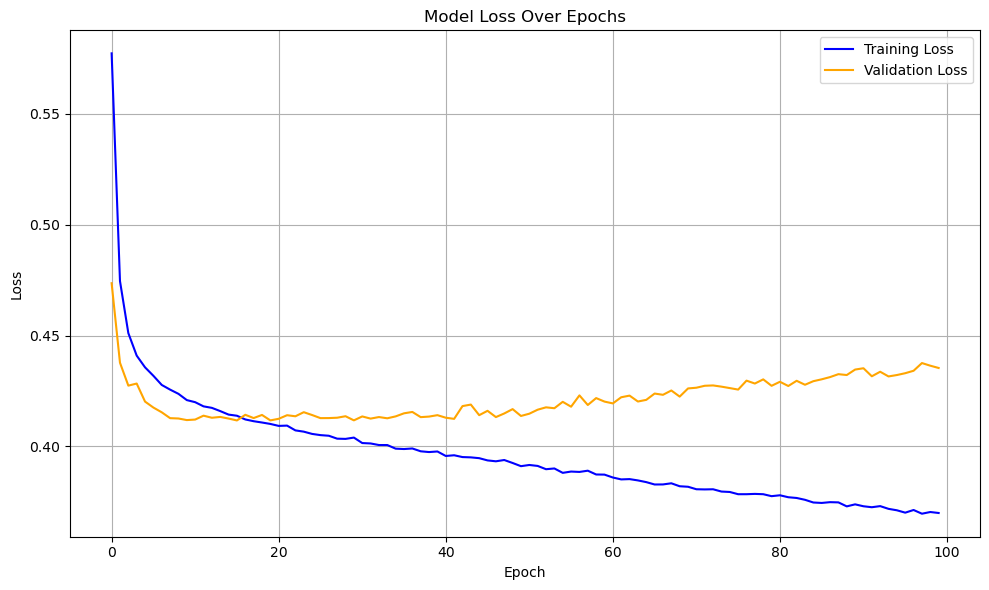

In [48]:
# Plotting Epoch vs Loss

plt.figure(figsize = (10, 6))
plt.plot(history.history['loss'], label = 'Training Loss', color = 'blue')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'orange')

plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(loc = 'upper right')
plt.grid(True)
plt.tight_layout()

plt.show()


Training Loss follows a steady downward trend, which is good—it means the model is learning from the data and improving. <br />
Validation Loss initially drops, but begins fluctuating, which could indicate some instability or early signs of overfitting.